In [7]:
from data.load_all_datasets import load_data
from extractors.extractor import MultiGeneticExtractor
import numpy as np
import util
from algorithms import ShapeletTransformer
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from scipy.stats import entropy
from numpy.linalg import norm

In [2]:
data = sorted(load_data(), key=lambda x: x['n_samples']*x['n_features'])[6]

X = data['data'].drop('target', axis=1)
y = data['data'].loc[X.index, 'target']
map_dict = {}
for j, c in enumerate(np.unique(y)):
    map_dict[c] = j
y = y.map(map_dict)

print(Counter(y))

Counter({1: 12, 3: 12, 0: 12, 4: 12, 2: 12})


In [3]:
extractor = MultiGeneticExtractor(population_size=5, iterations=100, verbose=True,
                                  mutation_prob=0.25, crossover_prob=0.4, wait=5)

shap_transformer = ShapeletTransformer(method=extractor, max_len=data['n_features']//2, nr_shapelets=3, metric='ig')
shap_transformer.fit(X, y)
X_distances = shap_transformer.transform(X)

it		avg		std		max		time
1		0.39		0.089		0.566667	22.4498
2		0.41		0.085		0.566667	22.7869
3		0.4333		0.055		0.533333	22.1169
4		0.4433		0.051		0.533333	20.9349
5		0.4333		0.026		0.483333	20.8764


In [8]:
def jsd(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

def jsd_mult(distributions):
    normed_distributions = [dist / norm(dist, ord=1) for dist in distributions]
    _M = 0.5 * (np.sum(normed_distributions, axis=0))
    return 0.5 * sum([entropy(dist, _M) for dist in normed_distributions])

# TODO: below are uni-variate cases, we want to calculate JSD on multi-variate PDFs!   ---> And still have one value!!!

In [5]:
pos_distances = shap_transformer.transform(X.loc[y == 1, :])
pos_x1 = pos_distances[:, 0]
pos_x2 = pos_distances[:, 1]
neg_distances = shap_transformer.transform(X.loc[y == 0, :])
neg_x1 = neg_distances[:, 0]
neg_x2 = neg_distances[:, 1]

In [9]:
print(jsd_mult([shap_transformer.transform(X.loc[y == i, :]) for i in set(y)]))
print(jsd_mult([shap_transformer.transform(X.loc[y == i, :]) for i in set(y)]))
print(jsd_mult([shap_transformer.transform(X.loc[y == i])[:, 0] for i in set(y)]))
print(jsd_mult([shap_transformer.transform(X.loc[y == i])[:, 1] for i in set(y)]))
print(jsd_mult([shap_transformer.transform(X.loc[y == i])[:, 2] for i in set(y)]))

# These are just the raw distances, not distributions... apply histogram or smth like that

[0.17017246 0.11744716 0.07554814]
[0.17017246 0.11744716 0.07554814]
0.15733286934102417
0.11704715378460852
0.07554596094837934


0.0008643739022579398 0.705109340298956


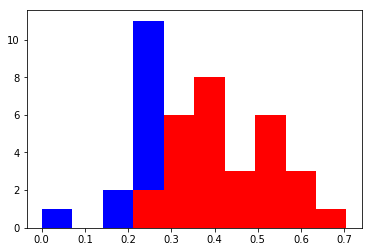

0.1920591040854979


In [167]:
min_dist = min(list(pos_x1) + list(neg_x1))
max_dist = max(list(pos_x1) + list(neg_x1))
print(min_dist, max_dist)

plt.hist(pos_x1, color='b', range=(min_dist, max_dist))
plt.hist(neg_x1, color='r', range=(min_dist, max_dist))
plt.show()

print(jsd(
    np.histogram(pos_x1, normed=True, range=(min_dist, max_dist))[0], 
    np.histogram(neg_x1, normed=True, range=(min_dist, max_dist))[0]
))

In [168]:
from scipy.stats import entropy
from numpy.linalg import norm
def jsd(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

0.0 0.35721450063535015


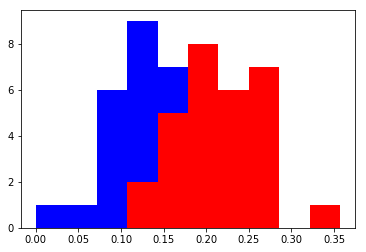

0.35289610850880393


In [169]:
min_dist = min(list(pos_x2) + list(neg_x2))
max_dist = max(list(pos_x2) + list(neg_x2))
print(min_dist, max_dist)


plt.hist(pos_x2, color='b', range=(min_dist, max_dist))
plt.hist(neg_x2, color='r', range=(min_dist, max_dist))
plt.show()

print(jsd(
    np.histogram(pos_x2, range=(min_dist, max_dist))[0], 
    np.histogram(neg_x2, range=(min_dist, max_dist))[0]
))

In [170]:
rand_shap = np.random.normal(size=25)
shap_transformer.shapelets = [
    rand_shap,
    list(rand_shap) + list(np.random.normal(size=5))
]

In [171]:
pos_distances = shap_transformer.transform(X.loc[y == 1, :]) - 1
pos_x1 = pos_distances[:, 0]
pos_x2 = pos_distances[:, 1]
neg_distances = shap_transformer.transform(X.loc[y == 0, :]) - 1
neg_x1 = neg_distances[:, 0]
neg_x2 = neg_distances[:, 1]

0.06246381299231829 0.16972944951099156


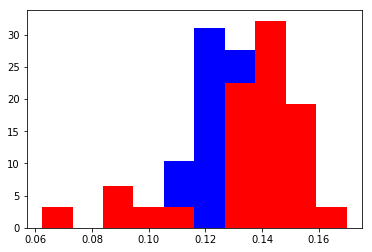

0.20458259651504718


In [172]:
min_dist = min(list(pos_x1) + list(neg_x1))
max_dist = max(list(pos_x1) + list(neg_x1))
print(min_dist, max_dist)
plt.hist(pos_x1, color='b', normed=True, range=(min_dist, max_dist))
plt.hist(neg_x1, color='r', normed=True, range=(min_dist, max_dist))
plt.show()

print(jsd(
    np.histogram(pos_x1, normed=True, range=(min_dist, max_dist))[0], 
    np.histogram(neg_x1, normed=True, range=(min_dist, max_dist))[0]
))

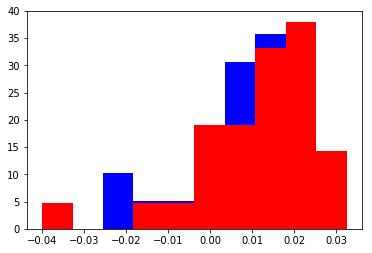

0.05035787155418883


In [173]:
min_dist = min(list(pos_x2) + list(neg_x2))
max_dist = max(list(pos_x2) + list(neg_x2))
plt.hist(pos_x2, color='b', normed=True, range=(min_dist, max_dist))
plt.hist(neg_x2, color='r', normed=True, range=(min_dist, max_dist))
plt.show()

print(jsd(
    np.histogram(pos_x2, normed=True, range=(min_dist, max_dist))[0], 
    np.histogram(neg_x2, normed=True, range=(min_dist, max_dist))[0]
))